# Importar librerías necesarias
En esta celda se importan las librerías requeridas para el análisis.

In [9]:
# Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import streamlit as st
import holidays

In [26]:
# Cargar los datos desde la carpeta data/raw/entrenamiento
df_ventas = pd.read_csv('../data/raw/entrenamiento/ventas.csv')
df_competencia = pd.read_csv('../data/raw/entrenamiento/competencia.csv')

# Mostrar las primeras filas del dataframe para verificar la carga
print("Datos cargados:")
print('ventas_df')
print(df_ventas.head())
print('\ncompetencia_df')
print(competencia_df.head())

Datos cargados:
ventas_df
        fecha producto_id                            nombre categoria  \
0  2021-10-25    PROD_001          Nike Air Zoom Pegasus 40   Running   
1  2021-10-25    PROD_002              Adidas Ultraboost 23   Running   
2  2021-10-25    PROD_003               Asics Gel Nimbus 25   Running   
3  2021-10-25    PROD_004  New Balance Fresh Foam X 1080v12   Running   
4  2021-10-25    PROD_005                Nike Dri-FIT Miler   Running   

         subcategoria  precio_base  es_estrella  unidades_vendidas  \
0  Zapatillas Running          115         True                  6   
1  Zapatillas Running          135         True                 10   
2  Zapatillas Running           85        False                  2   
3  Zapatillas Running           75        False                  2   
4        Ropa Running           35        False                  2   

   precio_venta  ingresos  
0        118.36    710.16  
1        136.82   1368.20  
2         84.93    169.86  
3 

In [27]:
ventas_df.head()

,fecha,producto_id,nombre,categoria,subcategoria,precio_base,es_estrella,unidades_vendidas,precio_venta,ingresos
0,2021-10-25,PROD_001,Nike Air Zoom Pegasus 40,Running,Zapatillas Running,115,True,6,118.36,710.16
1,2021-10-25,PROD_002,Adidas Ultraboost 23,Running,Zapatillas Running,135,True,10,136.82,1368.20
2,2021-10-25,PROD_003,Asics Gel Nimbus 25,Running,Zapatillas Running,85,False,2,84.93,169.86
3,2021-10-25,PROD_004,New Balance Fresh Foam X 1080v12,Running,Zapatillas Running,75,False,2,75.42,150.84
4,2021-10-25,PROD_005,Nike Dri-FIT Miler,Running,Ropa Running,35,False,2,35.87,71.74


In [30]:
ventas_df.columns

Index(['fecha', 'producto_id', 'nombre', 'categoria', 'subcategoria',
       'precio_base', 'es_estrella', 'unidades_vendidas', 'precio_venta',
       'ingresos'],
      dtype='object')

In [28]:
competencia_df.head()

,fecha,producto_id,Amazon,Decathlon,Deporvillage
0,2021-10-25,PROD_001,82.96,111.88,97.43
1,2021-10-25,PROD_002,112.56,108.61,115.58
2,2021-10-25,PROD_003,79.79,78.44,80.11
3,2021-10-25,PROD_004,72.60,67.29,74.45
4,2021-10-25,PROD_005,37.71,33.60,33.07


In [31]:
competencia_df.columns

Index(['fecha', 'producto_id', 'Amazon', 'Decathlon', 'Deporvillage'], dtype='object')

In [33]:
# Validar la calidad de los datos del dataframe ventas_df
# Tipos de datos
print('Tipos de datos:')
print(ventas_df.dtypes)

# Verificar valores nulos
print('Valores nulos:')
print(ventas_df.isnull().sum())

# Verificar duplicados
print('Duplicados:')
print(ventas_df.duplicated().sum())

# Estadísticas descriptivas
print('Estadísticas descriptivas:')
print(ventas_df.describe(include='all'))

# Informe final
print('Informe final de calidad de datos:')
print(f'Total de filas: {ventas_df.shape[0]}')
print(f'Total de columnas: {ventas_df.shape[1]}')
print(f'Columnas con valores nulos: {ventas_df.isnull().sum().sum()}')
print(f'Registros duplicados: {ventas_df.duplicated().sum()}')

Tipos de datos:
fecha                 object
producto_id           object
nombre                object
categoria             object
subcategoria          object
precio_base            int64
es_estrella             bool
unidades_vendidas      int64
precio_venta         float64
ingresos             float64
dtype: object
Valores nulos:
fecha                0
producto_id          0
nombre               0
categoria            0
subcategoria         0
precio_base          0
es_estrella          0
unidades_vendidas    0
precio_venta         0
ingresos             0
dtype: int64
Duplicados:
0
Estadísticas descriptivas:
             fecha producto_id                    nombre categoria  \
count         3552        3552                      3552      3552   
unique         148          24                        24         4   
top     2021-10-25    PROD_001  Nike Air Zoom Pegasus 40   Running   
freq            24         148                       148      1184   
mean           NaN         NaN 

In [ ]:
# Convertir la columna 'fecha' a formato datetime en ambos dataframes
ventas_df['fecha'] = pd.to_datetime(ventas_df['fecha'], errors='coerce')
competencia_df['fecha'] = pd.to_datetime(competencia_df['fecha'], errors='coerce')

# Verificar las conversiones
print("Ventas DF - Tipos de datos después de la conversión:")
print(ventas_df.dtypes)
print("\nCompetencia DF - Tipos de datos después de la conversión:")
print(competencia_df.dtypes)

Ventas DF - Tipos de datos después de la conversión:
fecha                datetime64[ns]
producto_id                  object
nombre                       object
categoria                    object
subcategoria                 object
precio_base                   int64
es_estrella                    bool
unidades_vendidas             int64
precio_venta                float64
ingresos                    float64
dtype: object

Competencia DF - Tipos de datos después de la conversión:
fecha           datetime64[ns]
producto_id             object
Amazon                 float64
Decathlon              float64
Deporvillage           float64
dtype: object


In [36]:
ventas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3552 entries, 0 to 3551
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   fecha              3552 non-null   datetime64[ns]
 1   producto_id        3552 non-null   object        
 2   nombre             3552 non-null   object        
 3   categoria          3552 non-null   object        
 4   subcategoria       3552 non-null   object        
 5   precio_base        3552 non-null   int64         
 6   es_estrella        3552 non-null   bool          
 7   unidades_vendidas  3552 non-null   int64         
 8   precio_venta       3552 non-null   float64       
 9   ingresos           3552 non-null   float64       
dtypes: bool(1), datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 253.3+ KB


In [37]:
competencia_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3552 entries, 0 to 3551
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   fecha         3552 non-null   datetime64[ns]
 1   producto_id   3552 non-null   object        
 2   Amazon        3552 non-null   float64       
 3   Decathlon     3552 non-null   float64       
 4   Deporvillage  3552 non-null   float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 138.9+ KB


In [38]:
# Integrar los datos de ventas_df y competencia_df
df = pd.merge(ventas_df, competencia_df, on=['fecha', 'producto_id'], how='inner')

# Mostrar las primeras filas del nuevo dataframe
print("Datos integrados:")
print(df.head())

Datos integrados:
       fecha producto_id                            nombre categoria  \
0 2021-10-25    PROD_001          Nike Air Zoom Pegasus 40   Running   
1 2021-10-25    PROD_002              Adidas Ultraboost 23   Running   
2 2021-10-25    PROD_003               Asics Gel Nimbus 25   Running   
3 2021-10-25    PROD_004  New Balance Fresh Foam X 1080v12   Running   
4 2021-10-25    PROD_005                Nike Dri-FIT Miler   Running   

         subcategoria  precio_base  es_estrella  unidades_vendidas  \
0  Zapatillas Running          115         True                  6   
1  Zapatillas Running          135         True                 10   
2  Zapatillas Running           85        False                  2   
3  Zapatillas Running           75        False                  2   
4        Ropa Running           35        False                  2   

   precio_venta  ingresos  Amazon  Decathlon  Deporvillage  
0        118.36    710.16   82.96     111.88         97.43  
1     

In [52]:
df.head(10)

,fecha,producto_id,nombre,categoria,subcategoria,precio_base,es_estrella,unidades_vendidas,precio_venta,ingresos,Amazon,Decathlon,Deporvillage
0,2021-10-25,PROD_001,Nike Air Zoom Pegasus 40,Running,Zapatillas Running,115,True,6,118.36,710.16,82.96,111.88,97.43
1,2021-10-25,PROD_002,Adidas Ultraboost 23,Running,Zapatillas Running,135,True,10,136.82,1368.20,112.56,108.61,115.58
2,2021-10-25,PROD_003,Asics Gel Nimbus 25,Running,Zapatillas Running,85,False,2,84.93,169.86,79.79,78.44,80.11
3,2021-10-25,PROD_004,New Balance Fresh Foam X 1080v12,Running,Zapatillas Running,75,False,2,75.42,150.84,72.60,67.29,74.45
4,2021-10-25,PROD_005,Nike Dri-FIT Miler,Running,Ropa Running,35,False,2,35.87,71.74,37.71,33.60,33.07
5,2021-10-25,PROD_006,Adidas Own The Run Jacket,Running,Ropa Running,65,False,2,65.51,131.02,70.47,58.07,64.83
6,2021-10-25,PROD_007,Puma Velocity Nitro 2,Running,Zapatillas Running,70,False,2,70.98,141.96,69.52,65.53,70.86
7,2021-10-25,PROD_008,Reebok Floatride Energy 5,Running,Zapatillas Running,65,False,2,66.60,133.20,65.86,60.24,66.94
8,2021-10-25,PROD_009,Bowflex SelectTech 552,Fitness,Mancuernas Ajustables,400,True,2,392.31,784.62,371.70,329.98,350.87
9,2021-10-25,PROD_010,Domyos BM900,Fitness,Banco Gimnasio,175,True,2,174.92,349.84,173.54,147.89,159.04


## Análisis temporal de unidades vendidas por año
En esta sección se grafican las líneas temporales de la suma de unidades vendidas por año, marcando los días de Black Friday.

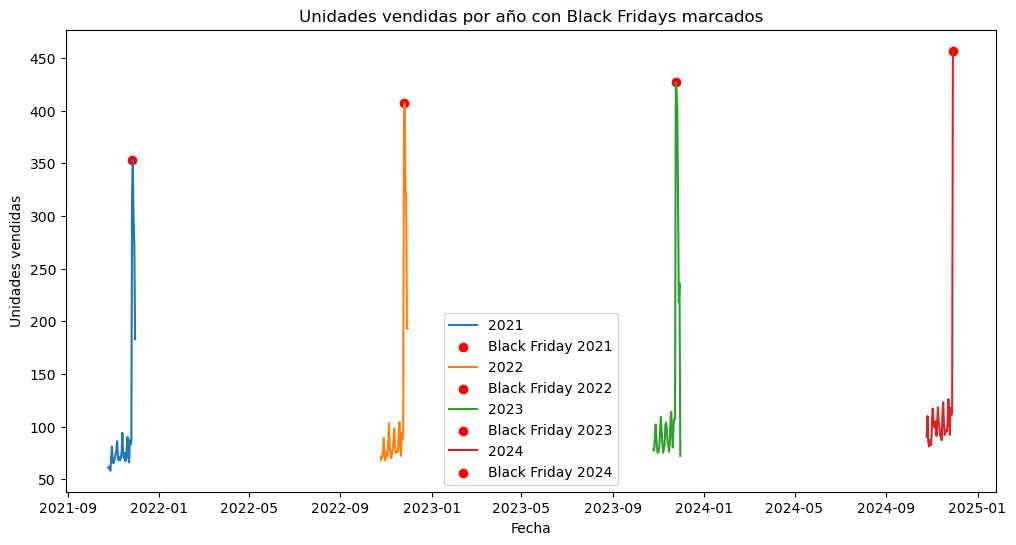

In [42]:
# Crear un gráfico de líneas para cada año con la suma de unidades vendidas
black_fridays = pd.to_datetime(['2021-11-26', '2022-11-25', '2023-11-24', '2024-11-29', '2025-11-28'])
black_fridays_series = pd.Series(black_fridays)
ventas_df['año'] = ventas_df['fecha'].dt.year
plt.figure(figsize=(12, 6))
for year in ventas_df['año'].unique():
    data = ventas_df[ventas_df['año'] == year].groupby('fecha')['unidades_vendidas'].sum().reset_index()
    sns.lineplot(data=data, x='fecha', y='unidades_vendidas', label=year)
    bf_year = black_fridays_series[black_fridays_series.dt.year == year]
    plt.scatter(bf_year, [data['unidades_vendidas'].max()] * len(bf_year), color='red', label=f'Black Friday {year}')
plt.title('Unidades vendidas por año con Black Fridays marcados')
plt.xlabel('Fecha')
plt.ylabel('Unidades vendidas')
plt.legend()
plt.show()

## Análisis de unidades vendidas por día de la semana
En esta sección se analiza la suma de unidades vendidas por día de la semana.

/var/folders/7c/8j885sqj3pqb9d318sjsnqdm0000gn/T/ipykernel_56518/2430385947.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x='día_semana', y='unidades_vendidas', palette='viridis')


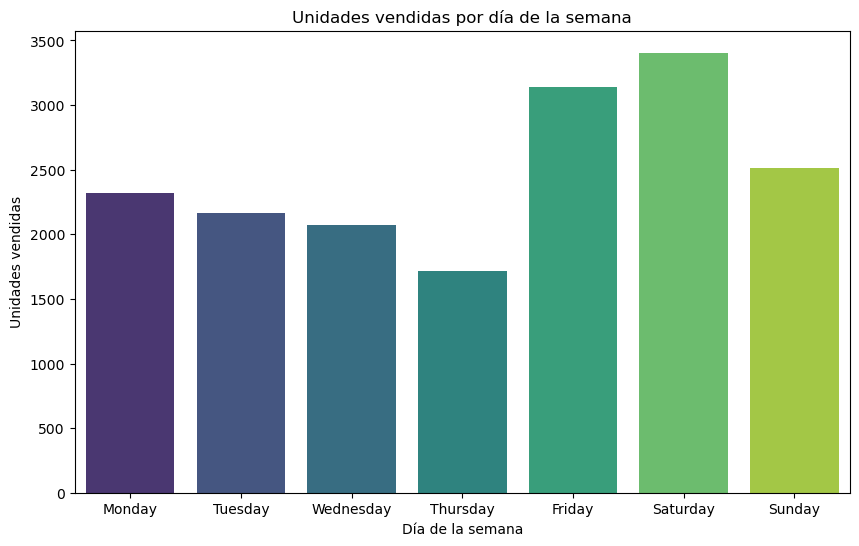

In [43]:
# Crear un gráfico de barras para unidades vendidas por día de la semana
ventas_df['día_semana'] = ventas_df['fecha'].dt.day_name()
orden_dias = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
data = ventas_df.groupby('día_semana')['unidades_vendidas'].sum().reindex(orden_dias).reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=data, x='día_semana', y='unidades_vendidas', palette='viridis')
plt.title('Unidades vendidas por día de la semana')
plt.xlabel('Día de la semana')
plt.ylabel('Unidades vendidas')
plt.show()

## Análisis de unidades vendidas por categoría
En esta sección se analiza la suma de unidades vendidas por categoría.

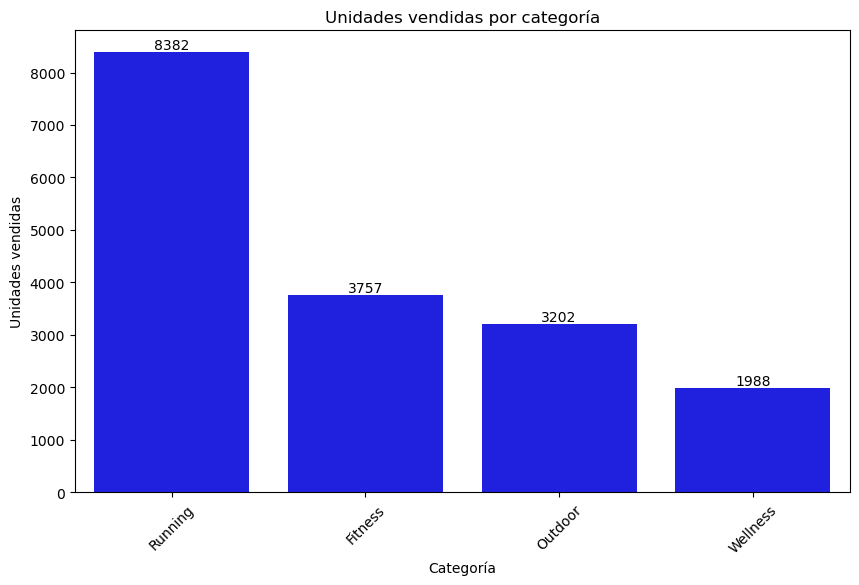

In [46]:
# Crear un gráfico de barras para unidades vendidas por categoría
data = ventas_df.groupby('categoria')['unidades_vendidas'].sum().sort_values(ascending=False).reset_index()
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=data, x='categoria', y='unidades_vendidas', color='blue')

# Añadir etiquetas de datos a cada barra
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 5), 
                textcoords='offset points')

plt.title('Unidades vendidas por categoría')
plt.xlabel('Categoría')
plt.ylabel('Unidades vendidas')
plt.xticks(rotation=45)
plt.show()

## Análisis de unidades vendidas por subcategoría
En esta sección se analiza la suma de unidades vendidas por subcategoría.

/var/folders/7c/8j885sqj3pqb9d318sjsnqdm0000gn/T/ipykernel_56518/3980669779.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x='subcategoria', y='unidades_vendidas', palette='viridis')


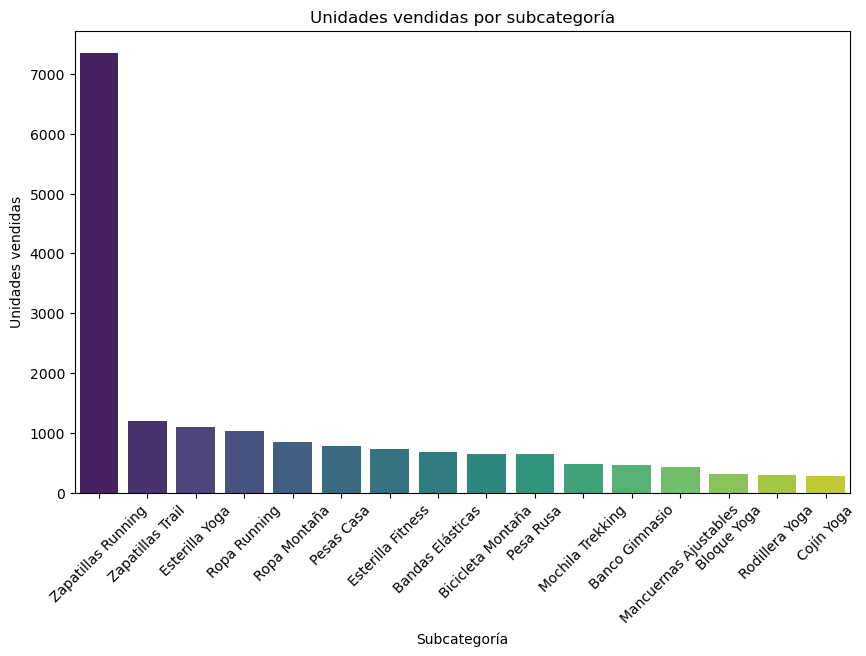

In [47]:
# Crear un gráfico de barras para unidades vendidas por subcategoría
data = ventas_df.groupby('subcategoria')['unidades_vendidas'].sum().sort_values(ascending=False).reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=data, x='subcategoria', y='unidades_vendidas', palette='viridis')
plt.title('Unidades vendidas por subcategoría')
plt.xlabel('Subcategoría')
plt.ylabel('Unidades vendidas')
plt.xticks(rotation=45)
plt.show()

## Análisis de los productos más vendidos
En esta sección se analizan los productos con mayores unidades vendidas.

/var/folders/7c/8j885sqj3pqb9d318sjsnqdm0000gn/T/ipykernel_56518/2930203111.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x='unidades_vendidas', y='nombre', palette='viridis')


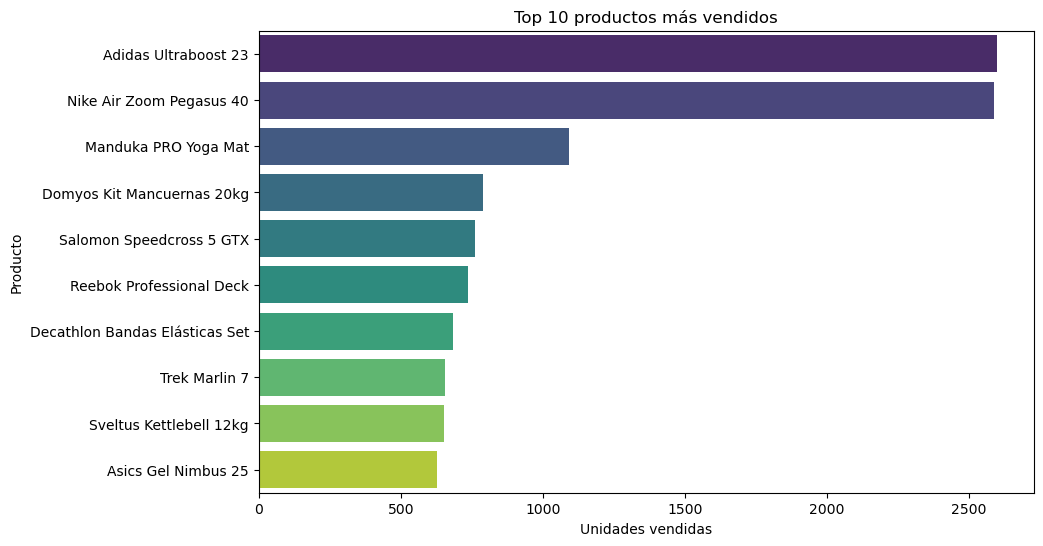

In [48]:
# Crear un gráfico de barras para los productos más vendidos
data = ventas_df.groupby('nombre')['unidades_vendidas'].sum().sort_values(ascending=False).head(10).reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=data, x='unidades_vendidas', y='nombre', palette='viridis')
plt.title('Top 10 productos más vendidos')
plt.xlabel('Unidades vendidas')
plt.ylabel('Producto')
plt.show()

## Análisis de densidad de precios
En esta sección se analiza la densidad de distribución de los precios de venta y los precios de Amazon.

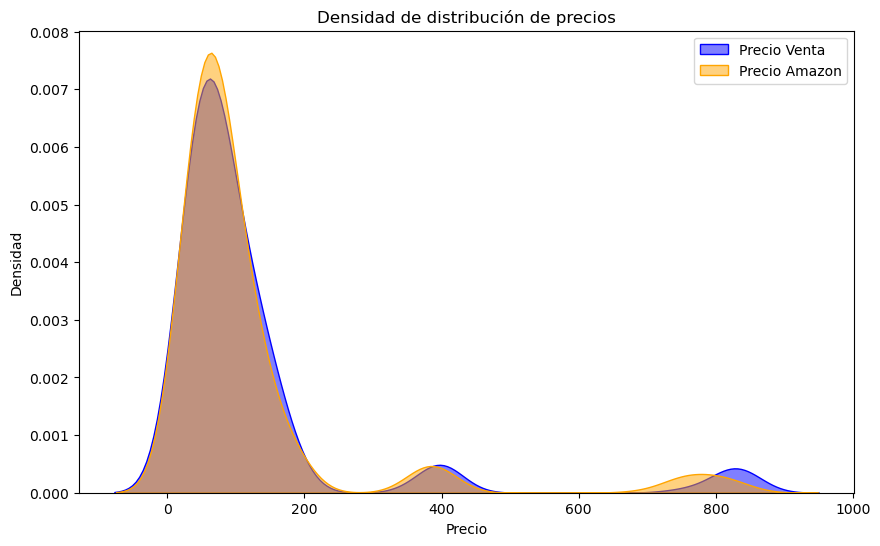

In [51]:
# Crear un gráfico de densidad para los precios de venta y precios de Amazon
competencia_df['Amazon'] = pd.to_numeric(competencia_df['Amazon'], errors='coerce')
ventas_df = pd.merge(ventas_df, competencia_df[['fecha', 'producto_id', 'Amazon']], on=['fecha', 'producto_id'], how='left')
plt.figure(figsize=(10, 6))
sns.kdeplot(data=ventas_df, x='precio_venta', label='Precio Venta', fill=True, color='blue', alpha=0.5)
sns.kdeplot(data=ventas_df.dropna(subset=['Amazon']), x='Amazon', label='Precio Amazon', fill=True, color='orange', alpha=0.5)
plt.title('Densidad de distribución de precios')
plt.xlabel('Precio')
plt.ylabel('Densidad')
plt.legend()
plt.show()

In [53]:
df.head(15)

,fecha,producto_id,nombre,categoria,subcategoria,precio_base,es_estrella,unidades_vendidas,precio_venta,ingresos,Amazon,Decathlon,Deporvillage
0,2021-10-25,PROD_001,Nike Air Zoom Pegasus 40,Running,Zapatillas Running,115,True,6,118.36,710.16,82.96,111.88,97.43
1,2021-10-25,PROD_002,Adidas Ultraboost 23,Running,Zapatillas Running,135,True,10,136.82,1368.20,112.56,108.61,115.58
2,2021-10-25,PROD_003,Asics Gel Nimbus 25,Running,Zapatillas Running,85,False,2,84.93,169.86,79.79,78.44,80.11
3,2021-10-25,PROD_004,New Balance Fresh Foam X 1080v12,Running,Zapatillas Running,75,False,2,75.42,150.84,72.60,67.29,74.45
4,2021-10-25,PROD_005,Nike Dri-FIT Miler,Running,Ropa Running,35,False,2,35.87,71.74,37.71,33.60,33.07
5,2021-10-25,PROD_006,Adidas Own The Run Jacket,Running,Ropa Running,65,False,2,65.51,131.02,70.47,58.07,64.83
6,2021-10-25,PROD_007,Puma Velocity Nitro 2,Running,Zapatillas Running,70,False,2,70.98,141.96,69.52,65.53,70.86
7,2021-10-25,PROD_008,Reebok Floatride Energy 5,Running,Zapatillas Running,65,False,2,66.60,133.20,65.86,60.24,66.94
8,2021-10-25,PROD_009,Bowflex SelectTech 552,Fitness,Mancuernas Ajustables,400,True,2,392.31,784.62,371.70,329.98,350.87
9,2021-10-25,PROD_010,Domyos BM900,Fitness,Banco Gimnasio,175,True,2,174.92,349.84,173.54,147.89,159.04


In [54]:
# Guardar el dataframe procesado en la carpeta data/processed
ventas_df.to_csv('../data/processed/ventas_procesadas.csv', index=False)
competencia_df.to_csv('../data/processed/competencia_procesada.csv', index=False)
print("Dataframes guardados en la carpeta 'data/processed'.")

Dataframes guardados en la carpeta 'data/processed'.


In [56]:
# Dividir el dataframe en train_df (2021-2023) y validation_df (2024)
train_df = ventas_df[ventas_df['fecha'].dt.year.isin([2021, 2022, 2023])]
validation_df = ventas_df[ventas_df['fecha'].dt.year == 2024]

# Mostrar la cantidad de registros en cada conjunto
print(f"Registros en train_df (2021-2023): {train_df.shape[0]}")
print(f"Registros en validation_df (2024): {validation_df.shape[0]}")

# Guardar los conjuntos divididos
train_df.to_csv('../data/processed/train_df.csv', index=False)
validation_df.to_csv('../data/processed/validation_df.csv', index=False)
print("Conjuntos divididos y guardados en la carpeta 'data/processed'.")

Registros en train_df (2021-2023): 2664
Registros en validation_df (2024): 888
Conjuntos divididos y guardados en la carpeta 'data/processed'.


In [58]:
# Entrenar un modelo HistGradientBoostingRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Preparar los datos
train_df = pd.read_csv('../data/processed/train_df.csv')
validation_df = pd.read_csv('../data/processed/validation_df.csv')

# Seleccionar las variables predictoras y la target
predictoras = ['producto_id', 'categoria', 'subcategoria', 'precio_base', 'es_estrella', 'precio_venta']
X_train = train_df[predictoras]
y_train = train_df['unidades_vendidas']
X_validation = validation_df[predictoras]
y_validation = validation_df['unidades_vendidas']

# Codificar variables categóricas
X_train = pd.get_dummies(X_train, columns=['categoria', 'subcategoria'], drop_first=True)
X_validation = pd.get_dummies(X_validation, columns=['categoria', 'subcategoria'], drop_first=True)

# Asegurar que las columnas coincidan entre train y validation
X_validation = X_validation.reindex(columns=X_train.columns, fill_value=0)

# Codificar variables categóricas correctamente
X_train['producto_id'] = X_train['producto_id'].astype('category').cat.codes
X_validation['producto_id'] = X_validation['producto_id'].astype('category').cat.codes

# Entrenar el modelo
modelo = HistGradientBoostingRegressor(
    learning_rate=0.05,
    max_iter=500,
    max_depth=10,
    l2_regularization=1.0,
    random_state=42
)
modelo.fit(X_train, y_train)

# Predicciones
y_pred_train = modelo.predict(X_train)
y_pred_validation = modelo.predict(X_validation)

# Baseline naive que predice la media
y_baseline = [y_train.mean()] * len(y_validation)

# Calcular métricas
mae_modelo = mean_absolute_error(y_validation, y_pred_validation)
mse_modelo = mean_squared_error(y_validation, y_pred_validation)
r2_modelo = r2_score(y_validation, y_pred_validation)

mae_baseline = mean_absolute_error(y_validation, y_baseline)
mse_baseline = mean_squared_error(y_validation, y_baseline)
r2_baseline = r2_score(y_validation, y_baseline)

# Mostrar resultados
print("Métricas del modelo:")
print(f"MAE: {mae_modelo}")
print(f"MSE: {mse_modelo}")
print(f"R2: {r2_modelo}")

print("\nMétricas del baseline:")
print(f"MAE: {mae_baseline}")
print(f"MSE: {mse_baseline}")
print(f"R2: {r2_baseline}")

Métricas del modelo:
MAE: 1.3394308239114778
MSE: 6.089813149926719
R2: 0.8439993455854855

Métricas del baseline:
MAE: 3.3469652084516954
MSE: 39.059984534083625
R2: -0.0005862246875647514


/var/folders/7c/8j885sqj3pqb9d318sjsnqdm0000gn/T/ipykernel_56518/3478768460.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  noviembre_2024['predicciones'] = modelo.predict(X_noviembre)


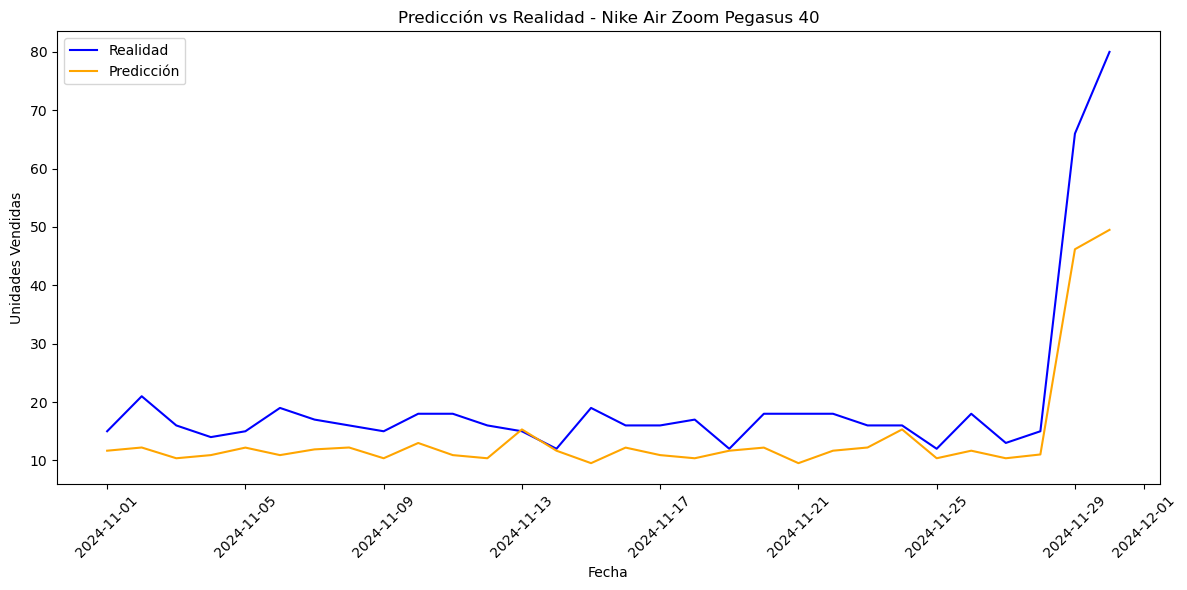

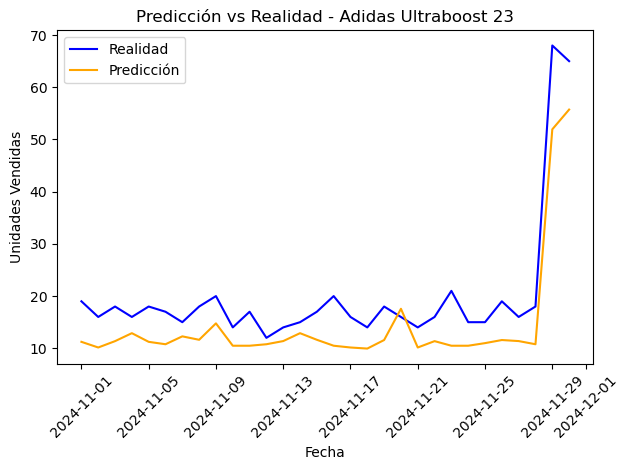

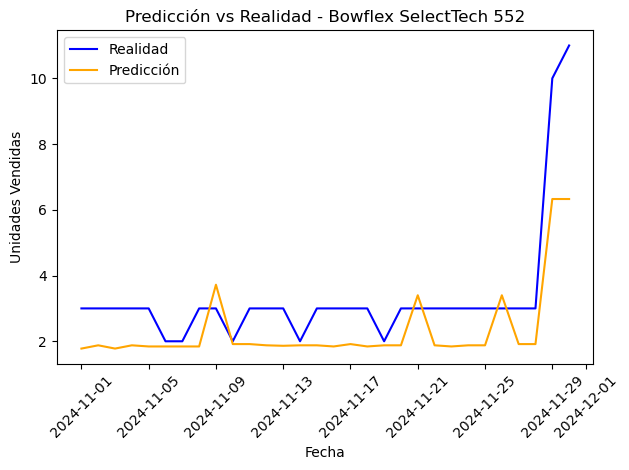

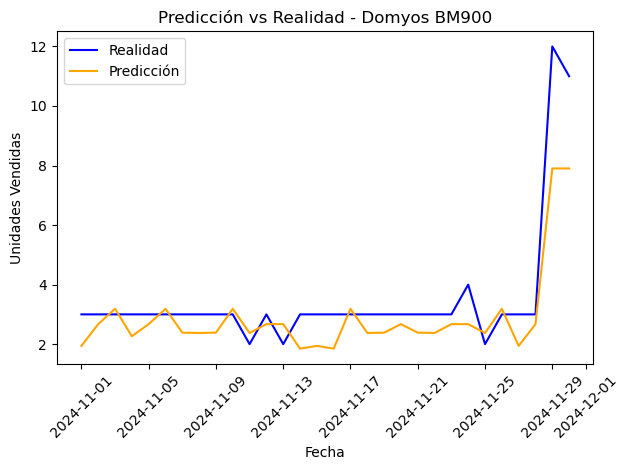

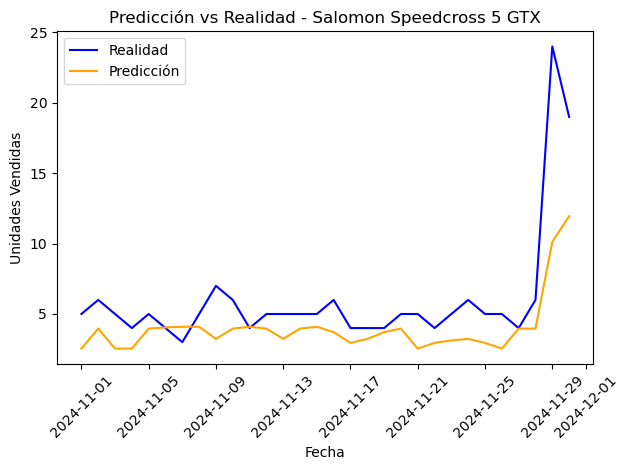

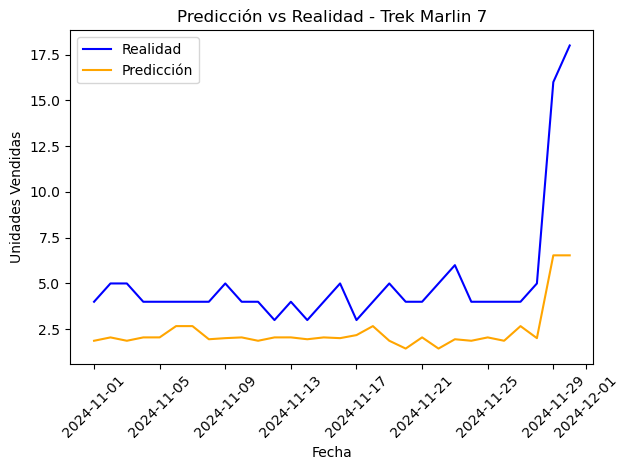

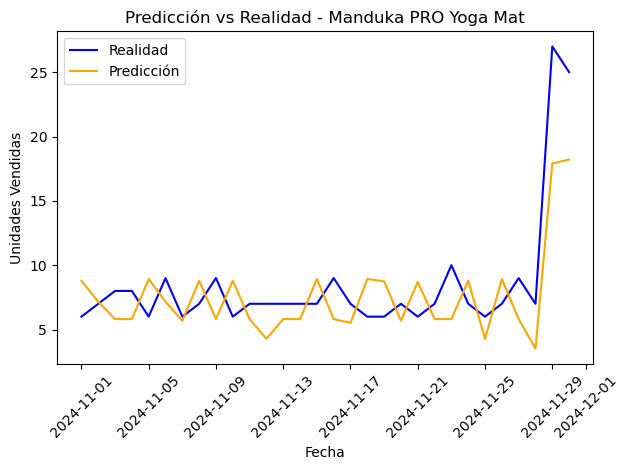

MAE por producto estrella:
Nike Air Zoom Pegasus 40: 5.960339396532356
Adidas Ultraboost 23: 5.716137932076066
Bowflex SelectTech 552: 1.1067923423160129
Domyos BM900: 0.779830983688223
Salomon Speedcross 5 GTX: 2.108381420870376
Trek Marlin 7: 2.7199604857234823
Manduka PRO Yoga Mat: 2.537032365157056
Métricas por periodo:
Periodo 1: {'MAE': 2.523025501937004, 'MSE': 10.899521691532575, 'R2': 0.6866648892718079}
Periodo 2: {'MAE': 2.205727386976266, 'MSE': 9.64757493190776, 'R2': 0.6900936333660153}
Periodo 3: {'MAE': 4.240593508099689, 'MSE': 42.61073635844199, 'R2': 0.8223472535118156}


/var/folders/7c/8j885sqj3pqb9d318sjsnqdm0000gn/T/ipykernel_56518/3478768460.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  noviembre_2024['periodo'] = pd.cut(noviembre_2024['fecha'].dt.day, bins=[0, 10, 20, 30], labels=['Periodo 1', 'Periodo 2', 'Periodo 3'])


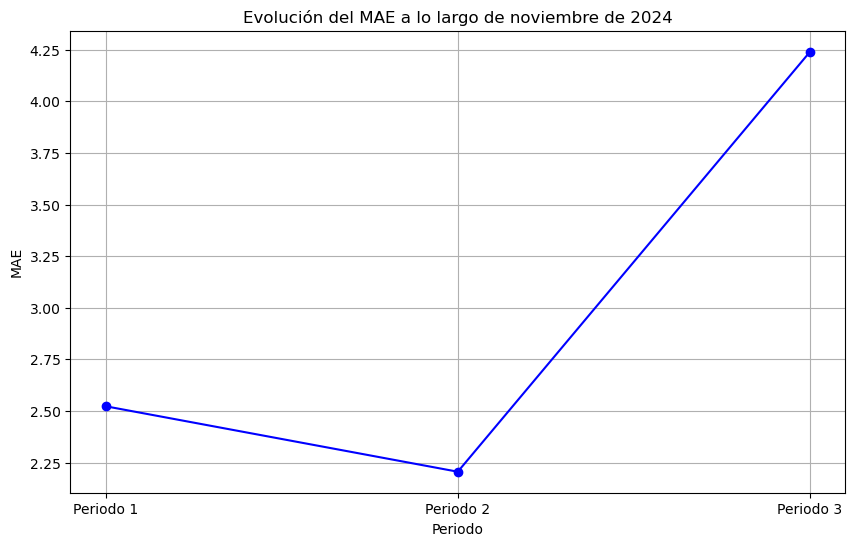

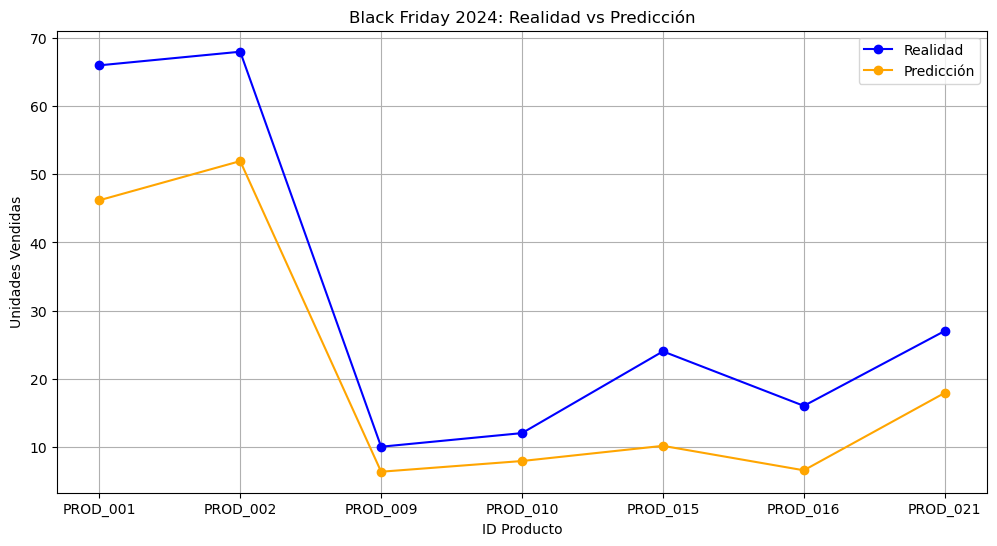

In [63]:
# Filtrar datos de noviembre de 2024 y productos estrella
noviembre_2024 = ventas_df[(ventas_df['fecha'].dt.year == 2024) & (ventas_df['fecha'].dt.month == 11) & (ventas_df['es_estrella'] == 1)]

# Preparar datos para predicción
X_noviembre = noviembre_2024[['producto_id', 'categoria', 'subcategoria', 'precio_base', 'es_estrella', 'precio_venta']]
X_noviembre = pd.get_dummies(X_noviembre, columns=['categoria', 'subcategoria'], drop_first=True)
X_noviembre['producto_id'] = X_noviembre['producto_id'].astype('category').cat.codes
X_noviembre = X_noviembre.reindex(columns=X_train.columns, fill_value=0)

# Generar predicciones
noviembre_2024['predicciones'] = modelo.predict(X_noviembre)

# Crear gráficos para cada producto estrella con ajuste en las fechas
productos_estrella = noviembre_2024['nombre'].unique()
plt.figure(figsize=(12, 6))
for producto in productos_estrella:
    datos_producto = noviembre_2024[noviembre_2024['nombre'] == producto]
    plt.plot(datos_producto['fecha'], datos_producto['unidades_vendidas'], label='Realidad', color='blue')
    plt.plot(datos_producto['fecha'], datos_producto['predicciones'], label='Predicción', color='orange')
    plt.title(f'Predicción vs Realidad - {producto}')
    plt.xlabel('Fecha')
    plt.ylabel('Unidades Vendidas')
    plt.xticks(rotation=45)  # Rotar las etiquetas de las fechas
    plt.legend()
    plt.tight_layout()  # Ajustar el diseño para evitar sobreposición
    plt.show()

# Calcular el MAE para cada producto estrella
productos_estrella = noviembre_2024['nombre'].unique()
mae_por_producto = {}
for producto in productos_estrella:
    datos_producto = noviembre_2024[noviembre_2024['nombre'] == producto]
    mae_producto = mean_absolute_error(datos_producto['unidades_vendidas'], datos_producto['predicciones'])
    mae_por_producto[producto] = mae_producto

# Mostrar el MAE por producto
print("MAE por producto estrella:")
for producto, mae in mae_por_producto.items():
    print(f"{producto}: {mae}")

# Dividir noviembre de 2024 en 3 periodos de 10 días
noviembre_2024['periodo'] = pd.cut(noviembre_2024['fecha'].dt.day, bins=[0, 10, 20, 30], labels=['Periodo 1', 'Periodo 2', 'Periodo 3'])

# Calcular métricas por periodo
metricas_por_periodo = {}
for periodo in noviembre_2024['periodo'].unique():
    datos_periodo = noviembre_2024[noviembre_2024['periodo'] == periodo]
    mae_periodo = mean_absolute_error(datos_periodo['unidades_vendidas'], datos_periodo['predicciones'])
    mse_periodo = mean_squared_error(datos_periodo['unidades_vendidas'], datos_periodo['predicciones'])
    r2_periodo = r2_score(datos_periodo['unidades_vendidas'], datos_periodo['predicciones'])
    metricas_por_periodo[periodo] = {'MAE': mae_periodo, 'MSE': mse_periodo, 'R2': r2_periodo}

# Mostrar métricas por periodo
print("Métricas por periodo:")
for periodo, metricas in metricas_por_periodo.items():
    print(f"{periodo}: {metricas}")

# Graficar la evolución del MAE a lo largo de los periodos
mae_evolucion = [metricas['MAE'] for metricas in metricas_por_periodo.values()]
plt.figure(figsize=(10, 6))
plt.plot(['Periodo 1', 'Periodo 2', 'Periodo 3'], mae_evolucion, marker='o', color='blue')
plt.title('Evolución del MAE a lo largo de noviembre de 2024')
plt.xlabel('Periodo')
plt.ylabel('MAE')
plt.grid(True)
plt.show()

# Filtrar datos del Black Friday de 2024
black_friday_2024 = noviembre_2024[noviembre_2024['fecha'] == '2024-11-29']

# Crear gráfico de real versus predicho para el Black Friday de 2024
plt.figure(figsize=(12, 6))
plt.plot(black_friday_2024['producto_id'], black_friday_2024['unidades_vendidas'], label='Realidad', color='blue', marker='o')
plt.plot(black_friday_2024['producto_id'], black_friday_2024['predicciones'], label='Predicción', color='orange', marker='o')
plt.title('Black Friday 2024: Realidad vs Predicción')
plt.xlabel('ID Producto')
plt.ylabel('Unidades Vendidas')
plt.legend()
plt.grid(True)
plt.show()

In [64]:
# Reentrenar el modelo HistGradientBoostingRegressor con todos los datos históricos disponibles
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Cargar el dataframe completo
ventas_df = pd.read_csv('../data/processed/ventas_procesadas.csv')
ventas_df['fecha'] = pd.to_datetime(ventas_df['fecha'])

# Seleccionar las variables predictoras y la target
predictoras = ['producto_id', 'categoria', 'subcategoria', 'precio_base', 'es_estrella', 'precio_venta']
X = ventas_df[predictoras]
y = ventas_df['unidades_vendidas']

# Codificar variables categóricas
X = pd.get_dummies(X, columns=['categoria', 'subcategoria'], drop_first=True)
X['producto_id'] = X['producto_id'].astype('category').cat.codes

# Entrenar el modelo
modelo_final = HistGradientBoostingRegressor(
    learning_rate=0.05,
    max_iter=500,
    max_depth=10,
    l2_regularization=1.0,
    random_state=42
)
modelo_final.fit(X, y)

# Mostrar mensaje de éxito
print("Modelo reentrenado exitosamente con todos los datos históricos disponibles.")

Modelo reentrenado exitosamente con todos los datos históricos disponibles.


/var/folders/7c/8j885sqj3pqb9d318sjsnqdm0000gn/T/ipykernel_56518/1475824359.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importancias_df, y='Variable', x='Importancia', palette='viridis')


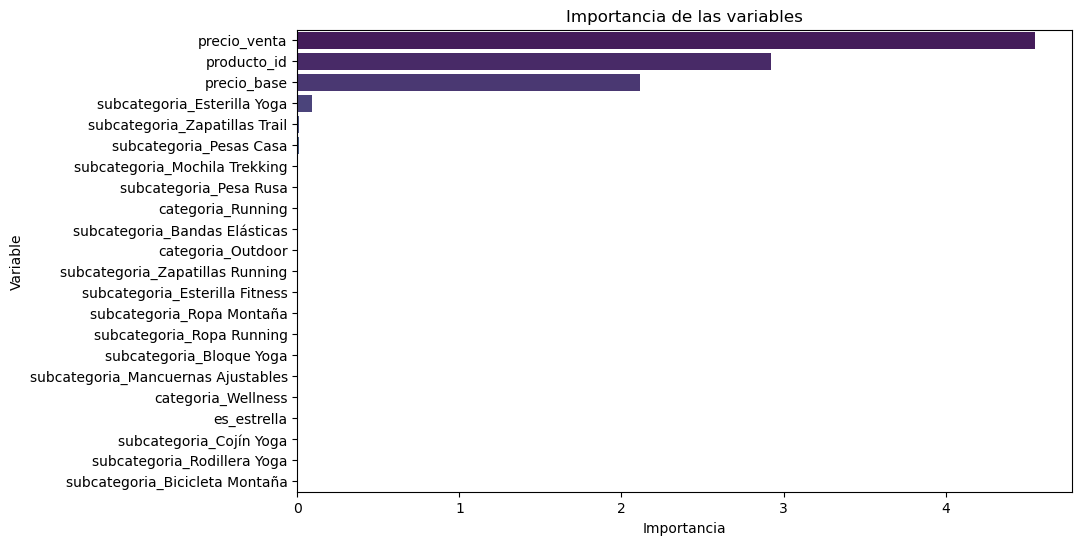

Modelo final guardado en la carpeta 'models' con el nombre 'modelo_final.joblib'.


In [65]:
# Calcular la importancia de variables con permutation importance
from sklearn.inspection import permutation_importance
import joblib

# Calcular la importancia de las variables
result = permutation_importance(modelo_final, X, y, n_repeats=10, random_state=42)
importancias = result.importances_mean

# Crear un dataframe para las importancias
importancias_df = pd.DataFrame({
    'Variable': X.columns,
    'Importancia': importancias
}).sort_values(by='Importancia', ascending=False)

# Graficar las importancias
plt.figure(figsize=(10, 6))
sns.barplot(data=importancias_df, y='Variable', x='Importancia', palette='viridis')
plt.title('Importancia de las variables')
plt.xlabel('Importancia')
plt.ylabel('Variable')
plt.show()

# Guardar el modelo final
joblib.dump(modelo_final, '../models/modelo_final.joblib')
print("Modelo final guardado en la carpeta 'models' con el nombre 'modelo_final.joblib'.")